# **ETL**

## Objectives

* Extract data from imageset, process and transform it, load it ready for use in dashboard

## Inputs

* image set downloaded from Kaggle "6 Human Emotions for image classification"

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Import Libraries

In [7]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [8]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Eddie\\Documents\\CodeInstitute Workspace\\Capstone Project'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [9]:
if os.path.basename(current_dir).lower() == "jupyter_notebooks":
    os.chdir(os.path.dirname(current_dir))
    print("You set a new current directory")

Confirm the new current directory

In [10]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Eddie\\Documents\\CodeInstitute Workspace\\Capstone Project'

# Extract the images into dataframe



Load the images

In [11]:
# Load an image from file
def load_images(folder):
    subfolders = [element for element in os.listdir(folder) if os.path.isdir(os.path.join(folder, element))]
    collection = []
    for subfolder in subfolders:
        subfolder_path = os.path.join(folder, subfolder)
        for filename in os.listdir(subfolder_path):
            img = cv2.imread(os.path.join(subfolder_path,filename))
            if img is not None:
                record = {
                    'subfolder': subfolder,
                    'image': img
                }
                collection.append(record)
    return collection

collection = load_images('./Data')

df = pd.DataFrame(collection)



Check the data

In [13]:

#check type of image data
type(df.iat[0, 1])

#check dataframe by type of subfolder
df['subfolder'].value_counts()

subfolder
happy      230
sad        224
anger      214
disgust    201
pain       168
fear       163
Name: count, dtype: int64

---

# Resizing + Padding

CNN requires image datasets of the same size. Versions of the dataframe that have images a) resized b) padded c) resized + padded will be created

Text(0.5, 1.0, 'Resized and Padded')

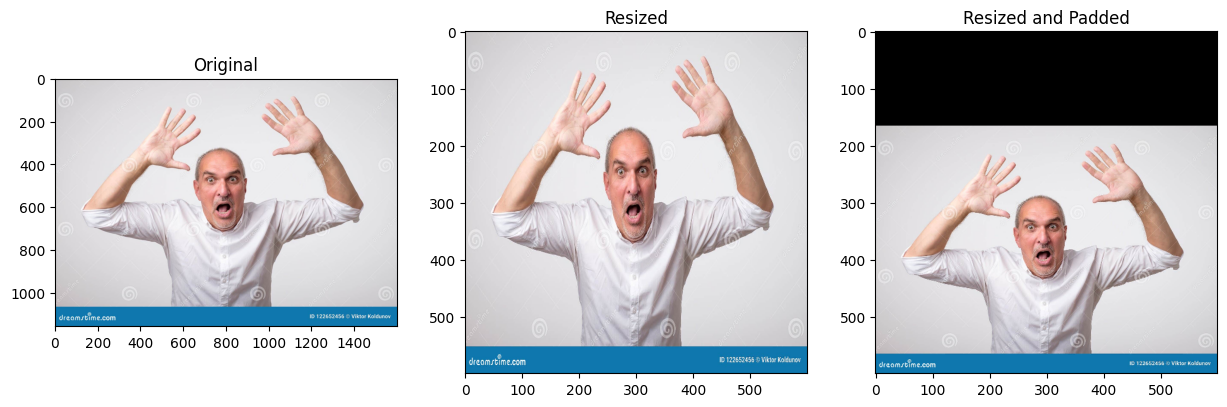

In [ ]:
# Create three derived DataFrames with images adjusted to (maxHeight, maxWidth)
# 1) resize (stretch to exact size)
# 2) pad (center pad to exact size)
# 3) resize (preserve aspect) then pad to exact size

# rely on existing imports and variables (cv2, np, pd, df, maxWidth, maxHeight)

def resize(img, th, tw):
    # make sure tw = target_width, th = target_height
    return cv2.resize(img, (tw, th), interpolation=cv2.INTER_CUBIC)

def resize_and_pad(img, th, tw):
    h, w = img.shape[:2]
    # scale to fit inside target (may upscale or downscale) preserving aspect
    if h > th or w > tw:
        scale = min(th / h, tw / w)
        resized = cv2.resize(img, dsize=None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    else:
        scale = min(th / h, tw / w)
        resized = cv2.resize(img, dsize=None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    h, w = resized.shape[:2]
    # compute padding amounts
    top = th - h
    right = tw - w
    return cv2.copyMakeBorder(resized, top, 0, 0, right,
                              cv2.BORDER_CONSTANT, value=(0, 0, 0))

# Build new DataFrames
resized_padded_images = []
resized_images = []

targetHeight = 600
targetWidth = 600

for img in df['image']:
    resized_padded_images.append(resize_and_pad(img, targetHeight, targetWidth))
    resized_images.append(resize(img, targetHeight, targetWidth))

df_resized_padded = df.copy()
df_resized_padded['image'] = resized_padded_images
 
df_resized = df.copy()
df_resized['image'] = resized_images


In [ ]:
#show sample images from each dataframe for verification
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(cv2.cvtColor(df['image'][0], cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[1].imshow(cv2.cvtColor(df_resized['image'][0], cv2.COLOR_BGR2RGB))
axs[1].set_title('Resized')
axs[2].imshow(cv2.cvtColor(df_resized_padded['image'][0], cv2.COLOR_BGR2RGB))
axs[2].set_title('Resized and Padded')

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.